In [1]:
# Load libraries
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from statistics import mean
import numpy as np
import joblib

In [2]:
# Train data
X_train = pd.read_csv('x_train.csv').to_numpy()
y_train = pd.read_csv('y_train.csv')
y_train = y_train['LABEL']

# Test data
X_test = pd.read_csv('x_test.csv').to_numpy()
y_test = pd.read_csv('y_test.csv')
y_test = y_test['LABEL']

# Validation data
X_validation = pd.read_csv('x_validation.csv').to_numpy()
y_validation = pd.read_csv('y_validation.csv')
y_validation = y_validation['LABEL']

In [3]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1, random_state=0)
# Train Adaboost Classifer
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)

In [4]:
joblib.dump(abc, 'modelo3.h5')

['modelo3.h5']

#### Validation data

In [5]:
abc.score(X_validation, y_validation)

0.7060063030695287

In [6]:
pred_validation = abc.predict(X_validation)

In [7]:
print(metrics.accuracy_score(y_validation, pred_validation))
print('Matriz de confusion', metrics.confusion_matrix(y_validation, pred_validation))
print(metrics.classification_report(y_validation, pred_validation, target_names=['0', '1', '2', '3']))

0.7060063030695287
Matriz de confusion [[48353  6443 13669     0]
 [13672 51289     0     0]
 [    1     0 92343     0]
 [    0     0 46161     0]]


c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      0.71      0.74     68465
           1       0.89      0.79      0.84     64961
           2       0.61      1.00      0.76     92344
           3       0.00      0.00      0.00     46161

    accuracy                           0.71    271931
   macro avg       0.57      0.62      0.58    271931
weighted avg       0.61      0.71      0.64    271931



c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Test data

In [8]:
#Predict the response for test dataset
y_pred = abc.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7067342872667995


In [10]:
print('Matriz de confusion', metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2', '3']))

Matriz de confusion [[ 97584  13225  27740      0]
 [ 28130 105161      2      0]
 [     4      0 187443      0]
 [     0      0  92811      0]]


c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.78      0.70      0.74    138549
           1       0.89      0.79      0.84    133293
           2       0.61      1.00      0.76    187447
           3       0.00      0.00      0.00     92811

    accuracy                           0.71    552100
   macro avg       0.57      0.62      0.58    552100
weighted avg       0.62      0.71      0.64    552100



c:\users\maria\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Extraido de: https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic curves')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

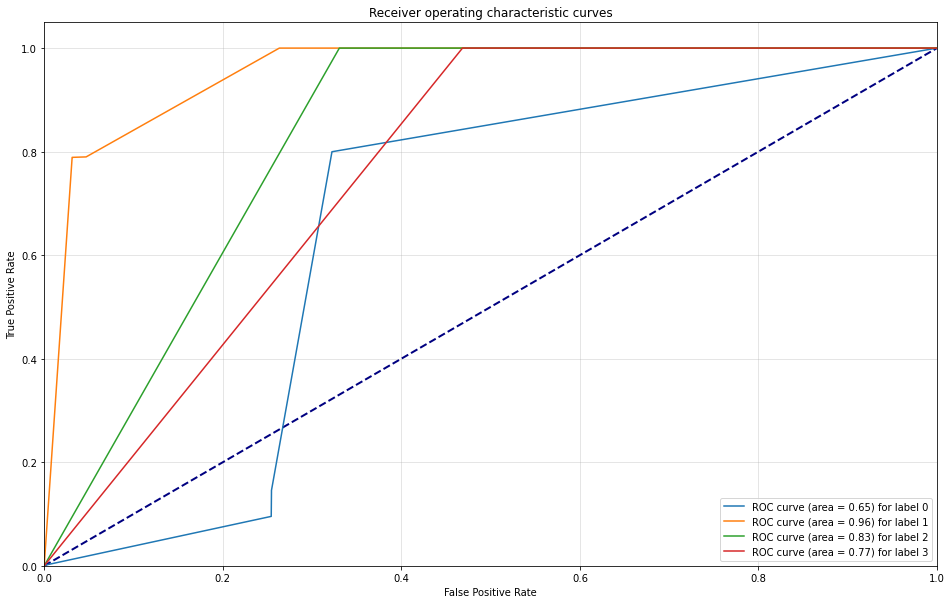

In [12]:
plot_multiclass_roc(abc, X_test, y_test, n_classes=4, figsize=(16, 10))

### Cross Validation
Fuente de consulta: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

In [13]:
rf_cv_score=cross_val_score(estimator=abc, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(rf_cv_score)

[0.7063496  0.70525741 0.70383756 0.70785881 0.70697513 0.70661768
 0.70757087 0.70540634 0.70711413 0.70469845]


In [14]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(abc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.706 (0.001)


In [16]:
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None) 

for train_index, test_index in kf.split(X_train):
      print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = X_train[train_index], X_train[test_index] 
      Y_train, Y_test = y_train[train_index], y_train[test_index]

Train: [      0       1       2 ... 1007143 1007146 1007148] Validation: [     26      30      40 ... 1007144 1007145 1007147]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     22      23      25 ... 1007101 1007125 1007137]
Train: [      1       4       5 ... 1007145 1007146 1007147] Validation: [      0       2       3 ... 1007129 1007131 1007148]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     12      18      28 ... 1007116 1007120 1007139]
Train: [      0       2       3 ... 1007146 1007147 1007148] Validation: [      1       9      17 ... 1007113 1007135 1007136]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      5       7      10 ... 1007130 1007140 1007141]
Train: [      0       1       2 ... 1007145 1007147 1007148] Validation: [      4      15      21 ... 1007133 1007143 1007146]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     44      85      86 ... 1007099 1

In [17]:
kf = KFold(n_splits=10)
for train, test in kf.split(X_train):
    print("%s %s" % (train, test))

[ 100715  100716  100717 ... 1007146 1007147 1007148] [     0      1      2 ... 100712 100713 100714]
[      0       1       2 ... 1007146 1007147 1007148] [100715 100716 100717 ... 201427 201428 201429]
[      0       1       2 ... 1007146 1007147 1007148] [201430 201431 201432 ... 302142 302143 302144]
[      0       1       2 ... 1007146 1007147 1007148] [302145 302146 302147 ... 402857 402858 402859]
[      0       1       2 ... 1007146 1007147 1007148] [402860 402861 402862 ... 503572 503573 503574]
[      0       1       2 ... 1007146 1007147 1007148] [503575 503576 503577 ... 604287 604288 604289]
[      0       1       2 ... 1007146 1007147 1007148] [604290 604291 604292 ... 705002 705003 705004]
[      0       1       2 ... 1007146 1007147 1007148] [705005 705006 705007 ... 805717 805718 805719]
[      0       1       2 ... 1007146 1007147 1007148] [805720 805721 805722 ... 906432 906433 906434]
[     0      1      2 ... 906432 906433 906434] [ 906435  906436  906437 ... 10071